In [57]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Implementation

In [133]:
class LinearRegression:
        def __init__(self, alpha=0.01, minimum_error_decrease=0.000001):
            self.weights = None
            self.intercept = None
            self.num_rows = None
            self.learning_rate = alpha
            self.minimum_error_decrease = minimum_error_decrease
            
        # cost / error function
        # sum of squared residuals, divided by twice the number of data points
        def cost(self, X, z):
            X2 = []
            for row in range(len(X)):
                new_row = X[row].copy()
                new_row.insert(0, 1)
                X2.append(new_row)
            X2 = np.asarray(X2)   
            
            residuals = np.dot(X2, self.weights) - z
            value = 1 / (2 * len(X2)) * np.dot(residuals.T, residuals)
            return value[0][0]
        
        def fit(self, X, z):
            # append a column of ones to the X matrix, for the y-intercept term
            X2 = []
            for row in range(len(X)):
                new_row = X[row].copy()
                new_row.insert(0, 1)
                X2.append(new_row)
            X2 = np.asarray(X2)   
            z = [[v] for v in z]
            z = np.asarray(z)     
            
            # initialize weights as 0
            self.weights = np.asarray([[0] for i in range(len(X2[0]))])
            
            m = len(X)            
            costs = []
            
            while True:
                
                # compute cost function
                curr_cost = self.cost(X, z)
                costs.append(curr_cost)
                previous = curr_cost
                
                # gradient descent 
                residuals = np.dot(X2, self.weights) - z
                self.weights = self.weights - (self.learning_rate / m) * np.dot(X2.T, residuals)
            
                # compute error of next iteration
                curr_cost = self.cost(X, z)
                diff = curr_cost - previous

                # if the cost function decreases by less than a certain amount, terminate
                if diff >= -self.minimum_error_decrease:
                    break
                    
        def predict(self, X):
            X2 = []
            for row in range(len(X)):
                new_row = X[row].copy()
                new_row.insert(0, 1)
                X2.append(new_row)
            X2 = np.asarray(X2)
            
            return np.dot(X2, self.weights)


## Testing

Text(0.5, 0, 'z')

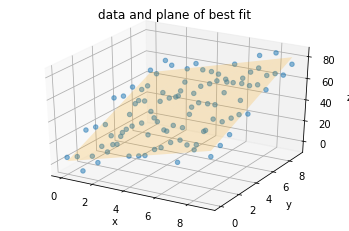

In [187]:
x = []
y = []
z = []
for yval in range(10):
    for xval in range (10):
        x.append(xval)
        y.append(yval)
        z.append(4 * xval + 5 * yval + 8 * np.random.normal())


# scatterplot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x, y, z, label='points', alpha=0.5)

# prediction surface
x_space = np.arange(10)
y_space = np.arange(10)
x_space, y_space = np.meshgrid(x_space, y_space)

xy_features = [[x_space[i][j], y_space[i][j]] for i in range(len(x_space)) for j in range(len(y_space))]

linreg = LinearRegression()
linreg.fit(xy_features, z)

predictions = np.asarray(linreg.predict(xy_features)).reshape(x_space.shape)

ax.plot_surface(x_space, y_space, predictions, linewidth=1, color='orange', alpha=0.2)
ax.set_title('data and plane of best fit')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#plt.legend()

In [188]:
linreg.weights

array([[1.86095616],
       [4.08480548],
       [4.67368436]])